In [2]:
import h5py
import torch
import json
import numpy as np

import os
import sys
sys.path.append("..")
import torch
import json
from ms import helper
import sys
import pandas as pd
import bio_helper
from ms.model import PrositFrag, pDeep2_nomod
from tqdm import tqdm
from ms.dataset import FragDataset, IrtDataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload

In [19]:
which = "gluc"
frag_model = 'prosit_l1'
result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
prosit_combined = pd.read_csv(os.path.join(
    no_finetuned_dir, "prosit_combined_target.psms"), sep='\t')
prosit_best = pd.read_csv(os.path.join(
    no_finetuned_dir, "prosit_best_target.psms"), sep='\t')
sa_feat = pd.read_csv(os.path.join(
    no_finetuned_dir, "sa_target.psms"), sep='\t')

finetuned_dir = os.path.join(result_dir, "finetuned_twofold")
finetune_prosit_combined = pd.read_csv(os.path.join(
    finetuned_dir, "prosit_combined_target.psms"), sep='\t')
finetune_prosit_best = pd.read_csv(os.path.join(
    finetuned_dir, "prosit_best_target.psms"), sep='\t')
finetune_sa_feat = pd.read_csv(os.path.join(
    finetuned_dir, "sa_target.psms"), sep='\t')


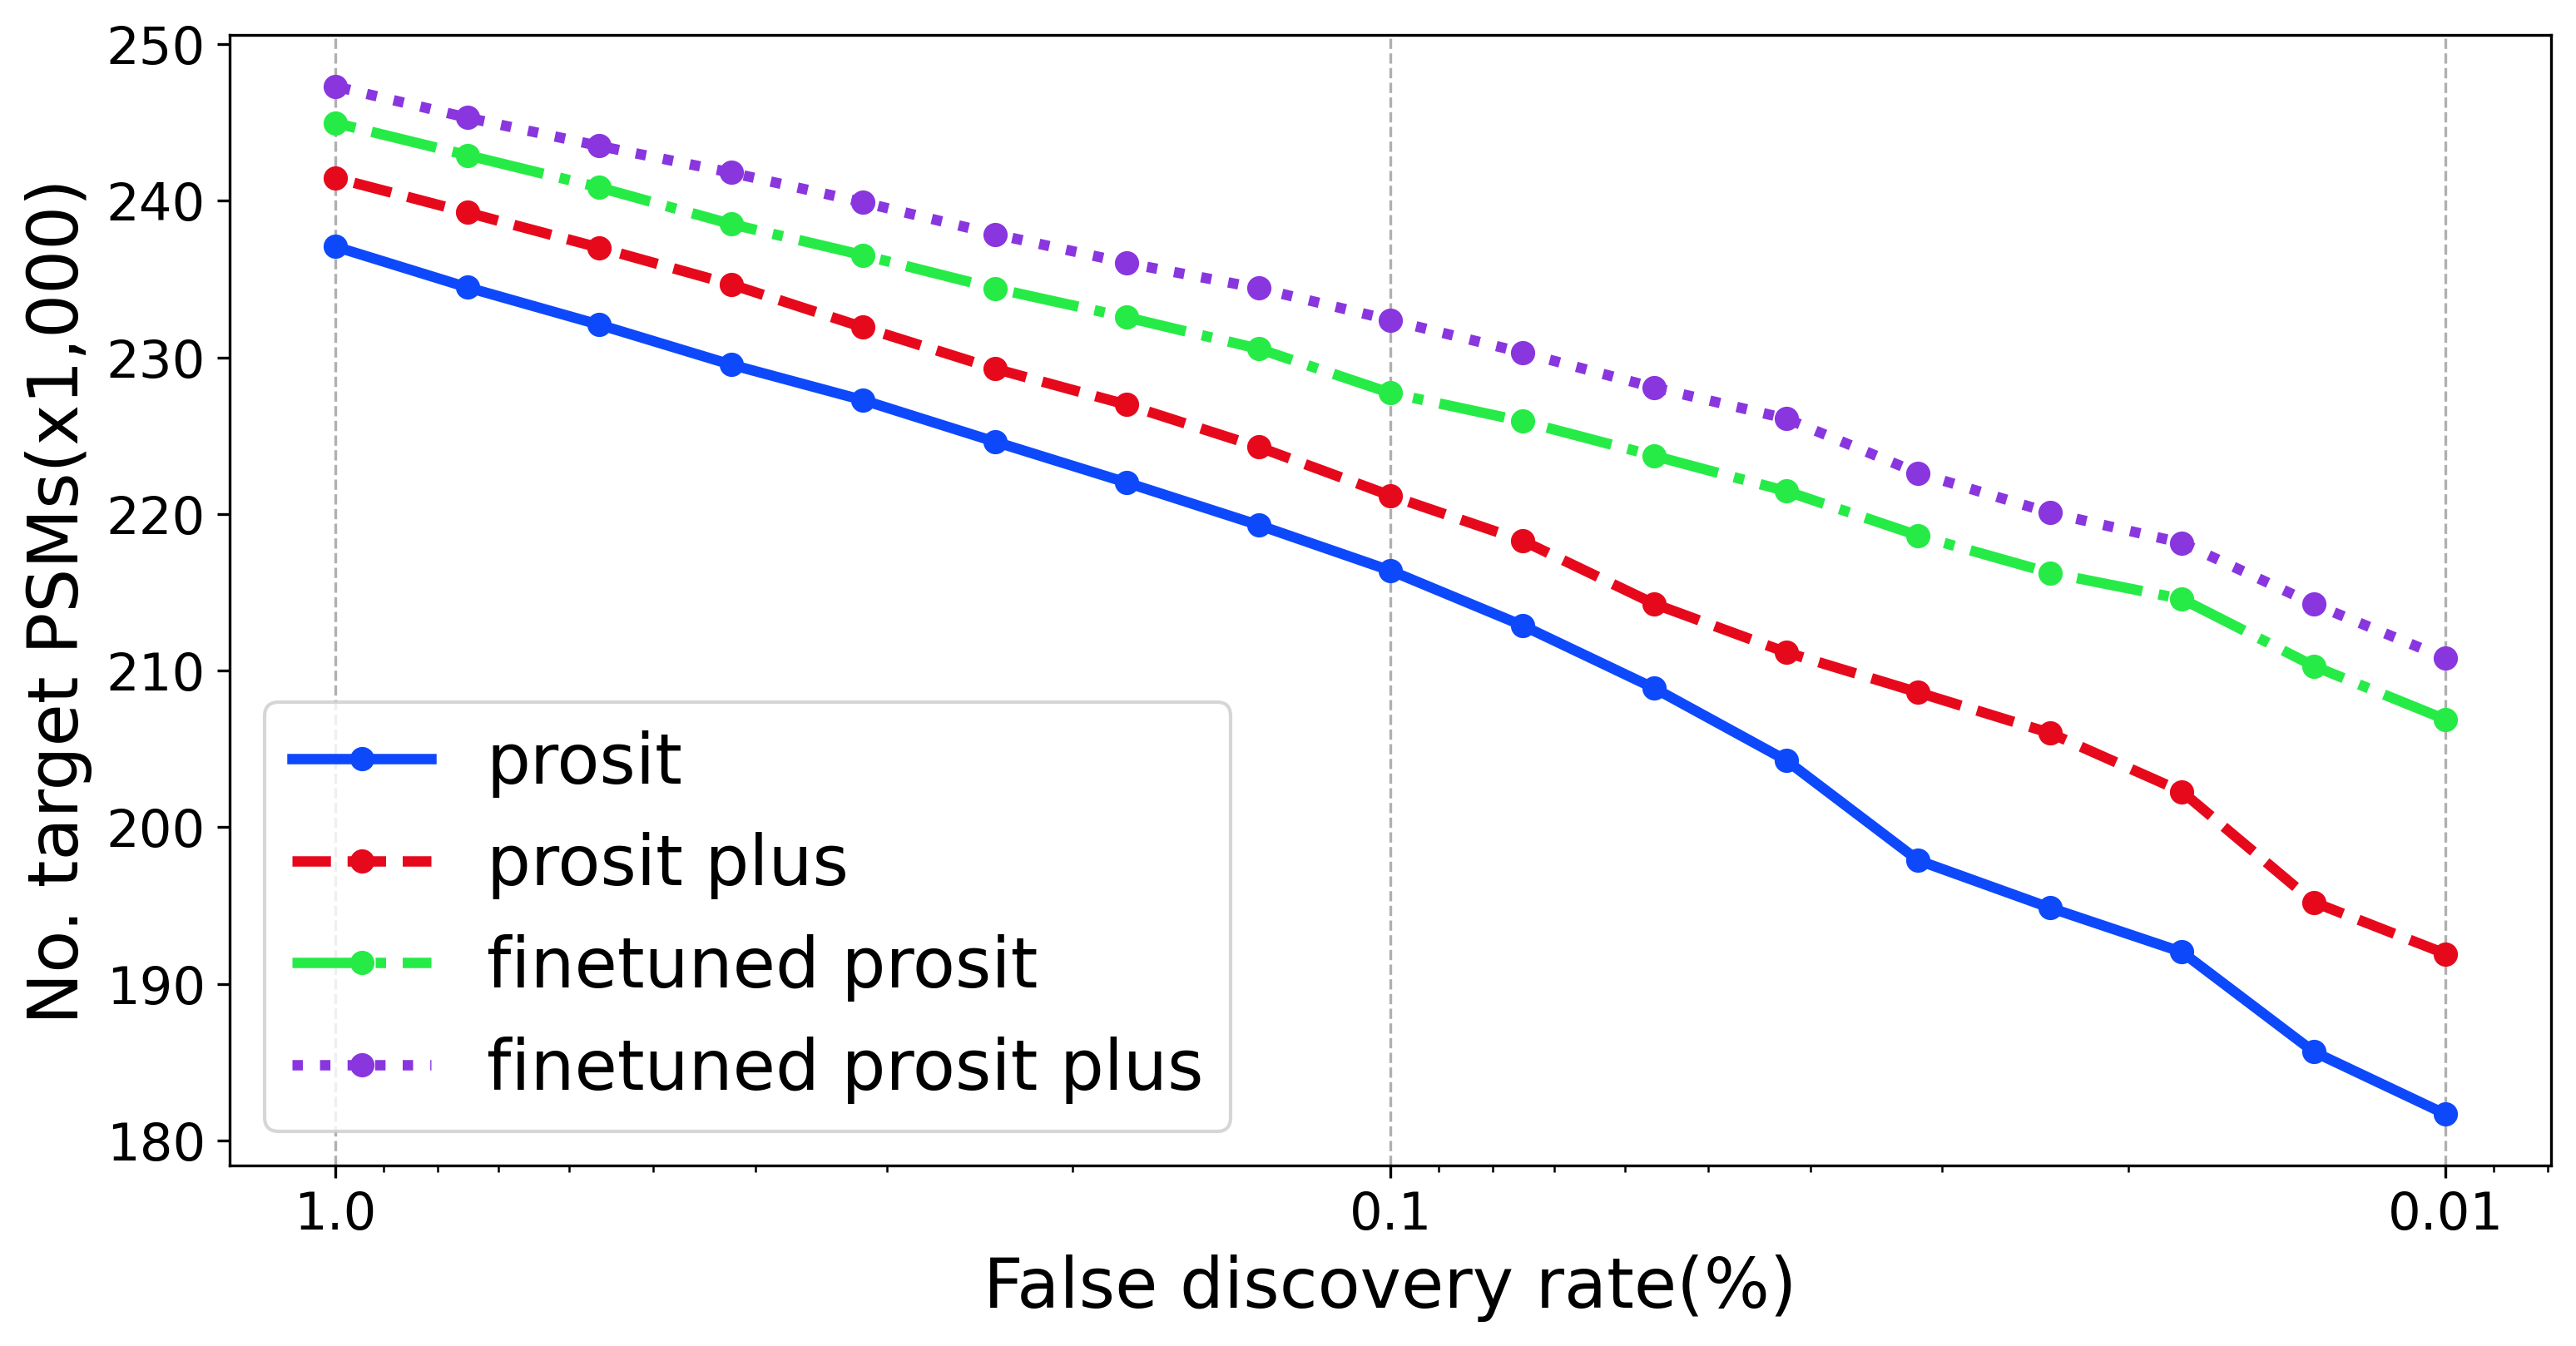

In [20]:
import matplotlib as mpl
plt.style.use(['ieee', "high-vis",'no-latex'])
plt.rcParams["font.family"] = "DejaVu Sans"

fdr_to_show = [0.0001*(10**0.125)**i for i in range(0, 17)]
nf_combined = []
nf_best = []
f_combined = []
f_best = []

scale = 1000
for fdr in fdr_to_show:
    nf_combined.append((prosit_combined['q-value'] < fdr).sum()/scale)
for fdr in fdr_to_show:
    nf_best.append((prosit_best['q-value'] < fdr).sum()/scale)
for fdr in fdr_to_show:
    f_combined.append((finetune_prosit_combined['q-value'] < fdr).sum()/scale)
for fdr in fdr_to_show:
    f_best.append((finetune_prosit_best['q-value'] < fdr).sum()/scale)

fig, ax = plt.subplots(figsize=(12,6), dpi=300)
ax.set_xscale('log')
ax.invert_xaxis()
fdr_to_plot = [i*100 for i in fdr_to_show]
plt.ticklabel_format(axis='y', style='sci')
# ax.grid()
ax.xaxis.grid(linestyle='--')
plt.plot(fdr_to_plot, nf_combined, marker='o',label="prosit", linewidth=3)
plt.plot(fdr_to_plot, nf_best, marker='o',label="prosit plus", linewidth=3)
plt.plot(fdr_to_plot, f_combined, marker='o',label="finetuned prosit", linewidth=3)
plt.plot(fdr_to_plot, f_best, marker='o',label="finetuned prosit plus", linewidth=3)

ax.set_xlabel("False discovery rate(%)", fontsize=20)
ax.set_ylabel("No. target PSMs(x1,000)", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(float(x), ',')))
ax.legend(loc="lower left", prop={'size': 20})

fig.savefig(f"fig/fig4-prosit-fdr-curve-{frag_model}-{which}.svg",dpi=300, bbox_inches="tight")

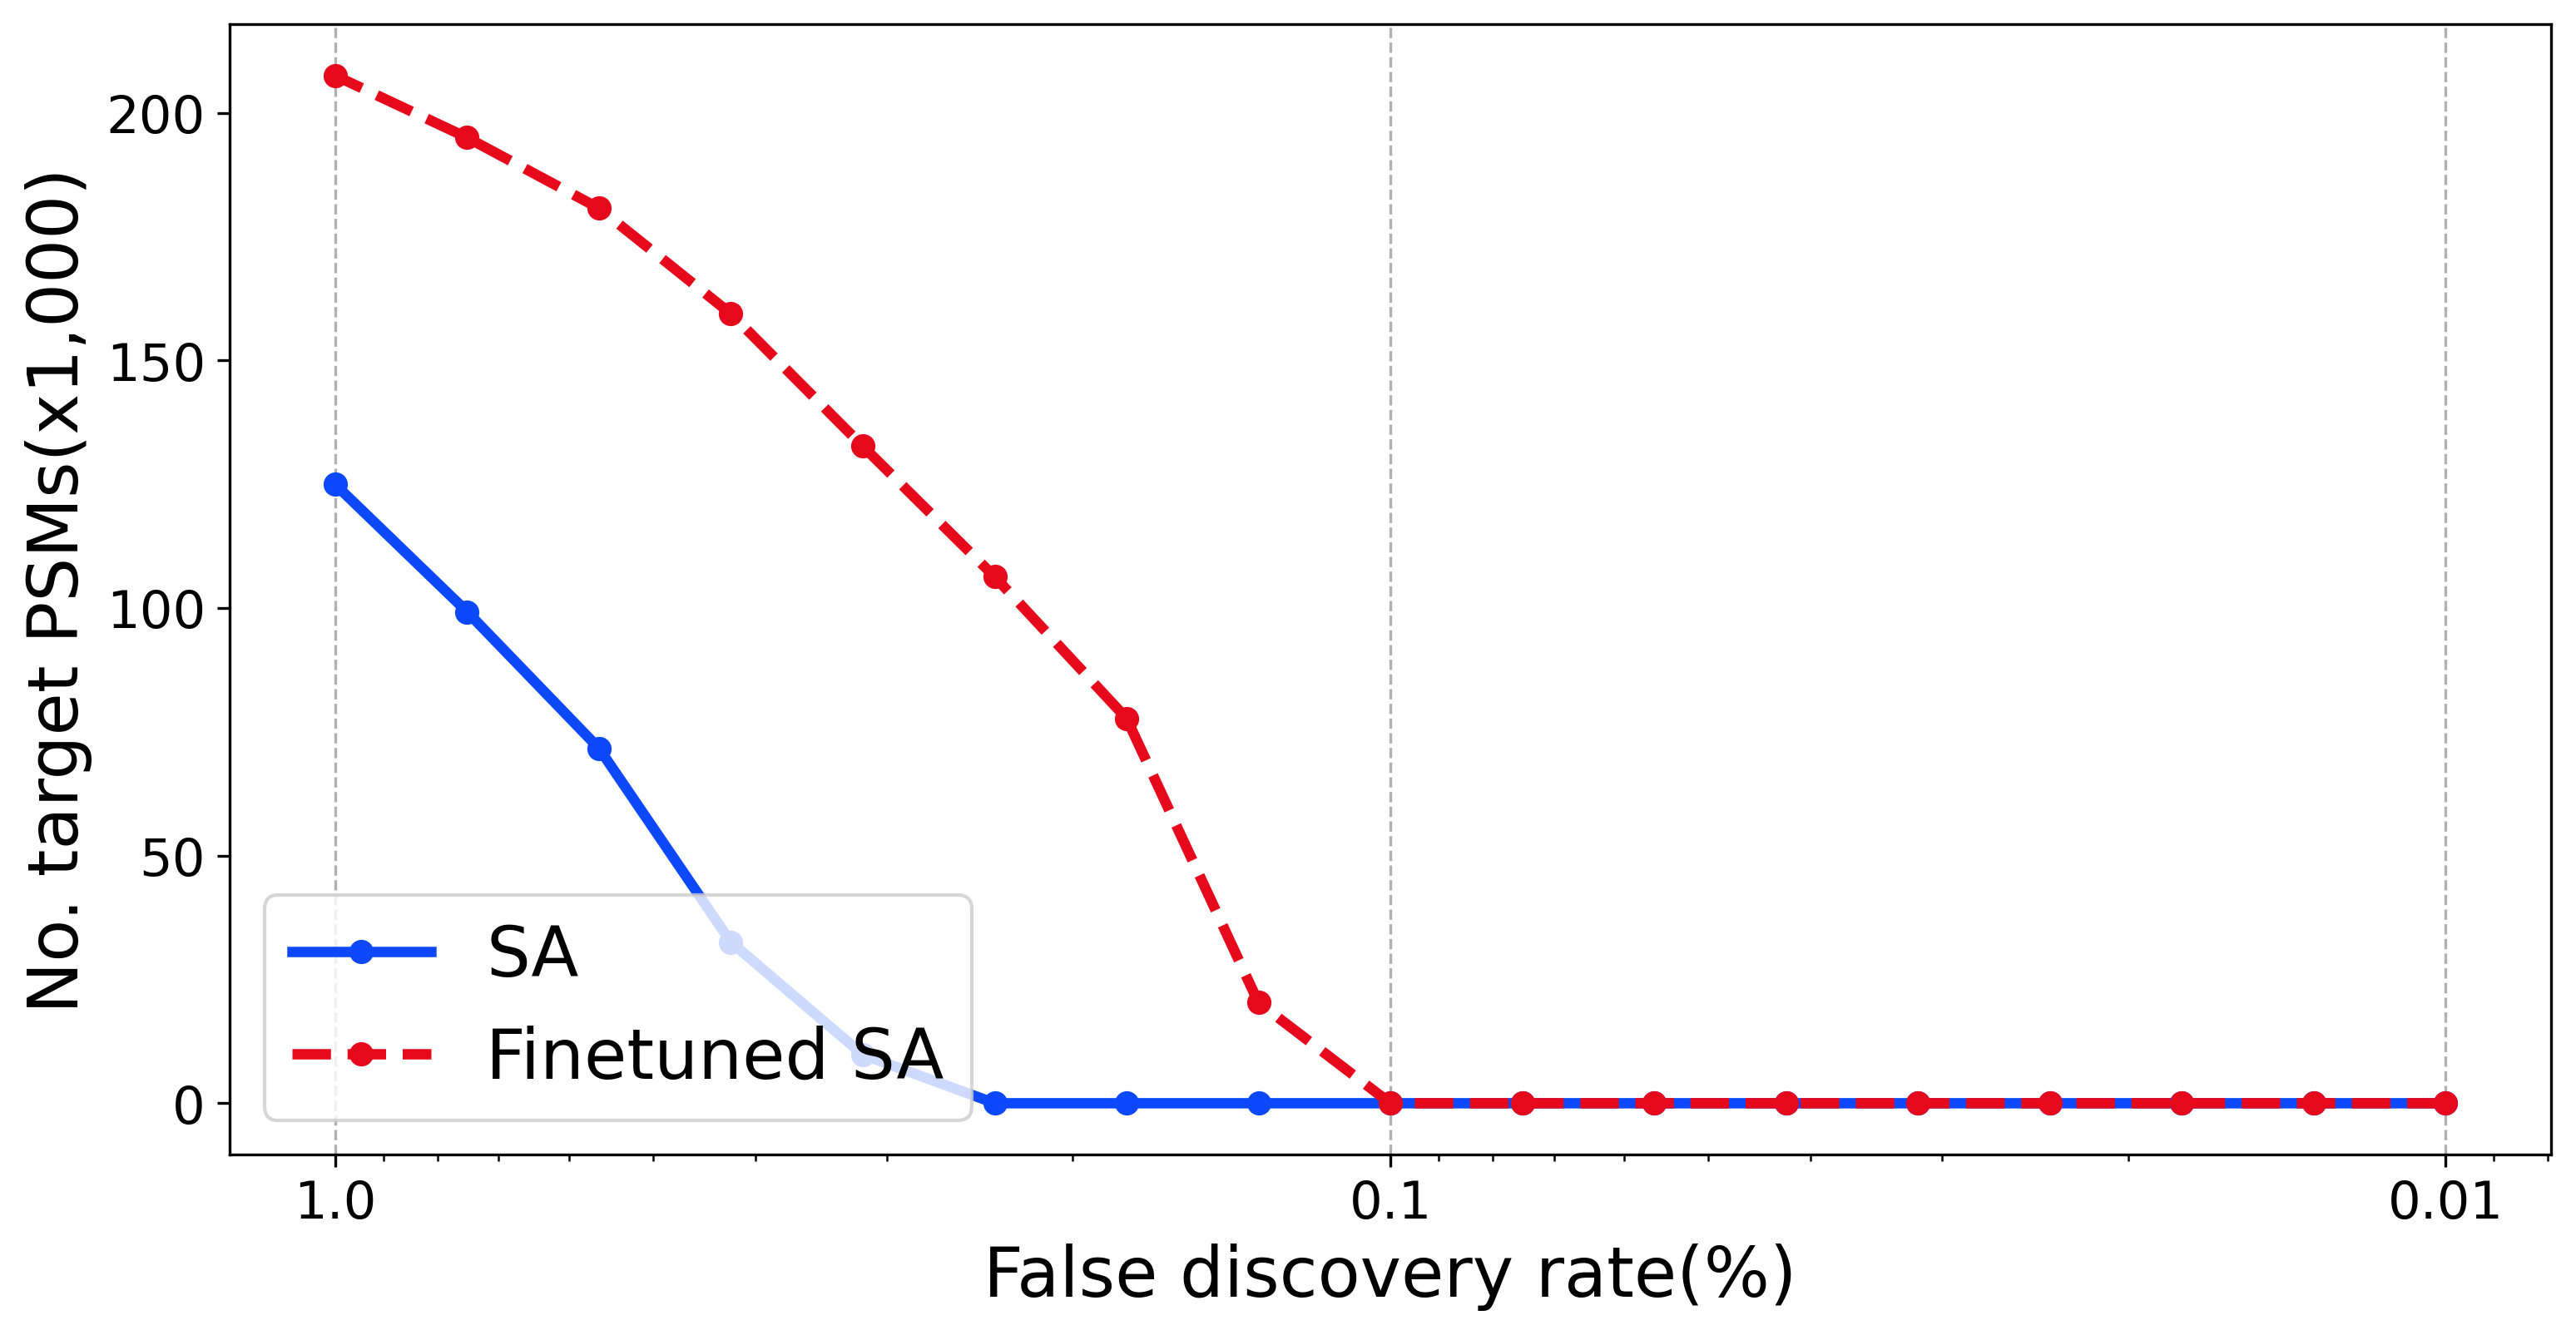

In [21]:
import matplotlib as mpl
plt.style.use(['ieee', "high-vis", 'no-latex'])
plt.rcParams["font.family"] = "DejaVu Sans"

fdr_to_show = [0.0001 * (10**0.125)**i for i in range(0, 17)]
nf_sa = []
f_sa = []

scale = 1000
for fdr in fdr_to_show:
    nf_sa.append((sa_feat['q-value'] < fdr).sum()/scale)
for fdr in fdr_to_show:
    f_sa.append((finetune_sa_feat['q-value'] < fdr).sum()/scale)

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
ax.set_xscale('log')
ax.invert_xaxis()
fdr_to_plot = [i*100 for i in fdr_to_show]
plt.ticklabel_format(axis='y', style='sci')
# ax.grid()
ax.xaxis.grid(linestyle='--')
plt.plot(fdr_to_plot, nf_sa, marker='o', label="SA", linewidth=3)
plt.plot(fdr_to_plot, f_sa, marker='o',
         label="Finetuned SA", linewidth=3)

ax.set_xlabel("False discovery rate(%)", fontsize=20)
ax.set_ylabel("No. target PSMs(x1,000)", fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x), ',')))
ax.legend(loc="lower left", prop={'size': 20})

fig.savefig(f"fig/fig4-sa-fdr-curve-{frag_model}-{which}.svg", dpi=300, bbox_inches="tight")